In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [13]:
dfn = pd.read_csv('clean.csv')

In [14]:
dfn.head()

,reporting_period,number_flights_matched,actual_flights_unmatched,number_flights_cancelled,flights_more_than_15_minutes_early_percent,flights_15_minutes_early_to_1_minute_early_percent,flights_0_to_15_minutes_late_percent,flights_between_16_and_30_minutes_late_percent,flights_between_31_and_60_minutes_late_percent,flights_between_61_and_120_minutes_late_percent,flights_between_121_and_180_minutes_late_percent,flights_between_181_and_360_minutes_late_percent,flights_more_than_360_minutes_late_percent,average_delay_mins,arrival_departure_A,arrival_departure_D,scheduled_charter_C,scheduled_charter_S
0,202201,4,0,0,0.000000,25.000000,0.000000,50.000000,25.000000,0.000000,0.000000,0.000000,0.0,19.0,0,1,0,1
1,202201,17,0,0,17.647059,35.294118,23.529412,5.882353,5.882353,0.000000,11.764706,0.000000,0.0,22.0,1,0,0,1
2,202201,56,0,3,15.254237,25.423729,25.423729,6.779661,10.169492,6.779661,3.389831,1.694915,0.0,23.0,1,0,0,1
3,202201,9,0,0,0.000000,44.444444,33.333333,0.000000,11.111111,0.000000,11.111111,0.000000,0.0,22.0,0,1,1,0
4,202201,5,0,0,0.000000,40.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.000000,0.0,18.0,0,1,0,1


In [15]:
#seperate target and features
target = dfn['average_delay_mins']
predictors = dfn.drop(['average_delay_mins'], axis=1)

In [16]:
#assign values to x and y
X = predictors.values
y = target.values

In [17]:
import tensorflow as tf 

In [18]:
#standardization of data
from sklearn.preprocessing import StandardScaler
predictorScaler = StandardScaler()
targetScaler = StandardScaler()


In [19]:
#Storing the fit object for later reference

predictorScalerFit = predictorScaler.fit(X)
targetScalerFit = targetScaler.fit(y.reshape(-1, 1))

In [20]:
#generating the standardized values of X and y using fit
X = predictorScalerFit.transform(X)
y = targetScalerFit.transform(y.reshape(-1, 1))

In [21]:
#split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4019, 17)
(1723, 17)
(4019, 1)
(1723, 1)


In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [25]:
# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

In [26]:
# Load the data
df = pd.read_csv('Made2.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'Made2.csv'

In [ ]:
#remove origin_destination_country

df = df.drop(['origin_destination_country'], axis=1)

In [ ]:
#select only numerics
dfn = df.select_dtypes(include=[np.number])

In [ ]:
#convert these columns to numeric using OneHotEncoding
#use 1,0 for True, False
df = pd.get_dummies(df, columns=['arrival_departure','scheduled_charter'])

#drop the columns that are not needed
df = df.drop(columns=['flights_unmatched_percent', 'flights_cancelled_percent'], axis=1)

In [ ]:
#replace 1,0 for True, False for arrival_departure_D column
df['arrival_departure_A'] = df['arrival_departure_A'].replace({True: 1, False: 0})
df['arrival_departure_D'] = df['arrival_departure_D'].replace({True: 1, False: 0})
df['scheduled_charter_C'] = df['scheduled_charter_C'].replace({True: 1, False: 0})
df['scheduled_charter_S'] = df['scheduled_charter_S'].replace({True: 1, False: 0})

In [ ]:
#show the airlines by its count
airlines_count = df['airline_name'].value_counts()

airlines_count

airline_name
RYANAIR                    12472
EASYJET UK LTD             10595
TUI AIRWAYS LTD             8609
BRITISH AIRWAYS PLC         6148
JET2.COM LTD                6072
                           ...  
HOP - BRIT AIR                 1
JET TIME                       1
WORLD2FLY PORTUGAL             1
JAZEERA AIRWAYS K.S.C.P        1
STAR EAST AIRLINES             1
Name: count, Length: 262, dtype: int64

In [ ]:
#subset airlines that have count greater than 100
df_100 = df[df['airline_name'].isin(airlines_count[airlines_count > 5000].index)]

df_100.shape

(43896, 21)

In [ ]:
# Remove duplicates based on the 'origin' and 'destination' and 'airline_name' columns
df_deduped = df.drop_duplicates(subset=['reporting_airport', 'origin_destination','airline_name'])

# Print the shape of the deduplicated DataFrame
print(df_deduped.shape)

(5742, 21)


In [ ]:
#combine reporting_airport and origin_destination columns as Journey
from pandas import DataFrame, merge
df_deduped['journey'] = df_deduped['reporting_airport'] + ', ' + df_deduped['origin_destination']

C:\Users\dkout\AppData\Local\Temp\ipykernel_9848\323433510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deduped['journey'] = df_deduped['reporting_airport'] + ', ' + df_deduped['origin_destination']


In [ ]:
#remove strings in the parentheses

import re

def remove_parentheses_contents(text):
    return re.sub(r'\(.*?\)', '', text).strip().replace(',,', ',')

df_deduped['journey'] = df_deduped['journey'].apply(remove_parentheses_contents)

C:\Users\dkout\AppData\Local\Temp\ipykernel_9848\1541931187.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deduped['journey'] = df_deduped['journey'].apply(remove_parentheses_contents)


In [ ]:
df_deduped.head()

,reporting_period,reporting_airport,origin_destination,airline_name,number_flights_matched,actual_flights_unmatched,number_flights_cancelled,flights_more_than_15_minutes_early_percent,flights_15_minutes_early_to_1_minute_early_percent,flights_0_to_15_minutes_late_percent,...,flights_between_61_and_120_minutes_late_percent,flights_between_121_and_180_minutes_late_percent,flights_between_181_and_360_minutes_late_percent,flights_more_than_360_minutes_late_percent,average_delay_mins,arrival_departure_A,arrival_departure_D,scheduled_charter_C,scheduled_charter_S,journey
0,202201,ABERDEEN,GDANSK,WIZZ AIR,4,0,0,0.000000,25.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,19.0,0,1,0,1,"ABERDEEN, GDANSK"
1,202201,ABERDEEN,BELFAST CITY (GEORGE BEST),LOGANAIR LTD,17,0,0,17.647059,35.294118,23.529412,...,0.000000,11.764706,0.000000,0.0,22.0,1,0,0,1,"ABERDEEN, BELFAST CITY"
3,202201,ABERDEEN,SUMBURGH,LOGANAIR LTD,56,0,3,15.254237,25.423729,25.423729,...,6.779661,3.389831,1.694915,0.0,23.0,1,0,0,1,"ABERDEEN, SUMBURGH"
4,202201,ABERDEEN,TENERIFE (SURREINA SOFIA),TUI AIRWAYS LTD,9,0,0,0.000000,44.444444,33.333333,...,0.000000,11.111111,0.000000,0.0,22.0,0,1,1,0,"ABERDEEN, TENERIFE"
5,202201,ABERDEEN,GENEVA,EASYJET UK LTD,5,0,0,0.000000,40.000000,20.000000,...,0.000000,0.000000,0.000000,0.0,18.0,0,1,0,1,"ABERDEEN, GENEVA"


In [ ]:
#remove the columns that are not needed
df_deduped = df_deduped.drop(['reporting_airport','origin_destination'], axis=1)

In [ ]:

dfn = df_deduped.select_dtypes(include=[np.number])
dfn.head()

NameError: name 'df_deduped' is not defined

In [ ]:
#export to csv
dfn.to_csv('clean.csv', index=False)

In [ ]:
#seperate target and features
target = dfn['average_delay_mins']
predictors = dfn.drop(['average_delay_mins'], axis=1)

In [ ]:
#assign values to x and y
X = predictors.values
y = target.values

In [ ]:
#install sk-learn library
#%pip install scikit-learn

In [ ]:
#standardization of data
from sklearn.preprocessing import StandardScaler
predictorScaler = StandardScaler()
targetScaler = StandardScaler()


In [ ]:
#Storing the fit object for later reference

predictorScalerFit = predictorScaler.fit(X)
targetScalerFit = targetScaler.fit(y.reshape(-1, 1))

In [ ]:
#generating the standardized values of X and y
X = predictorScalerFit.transform(X)
y = targetScalerFit.transform(y.reshape(-1, 1))

In [ ]:
#split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

print(y_test.shape)

(4019, 17)
(1723, 17)
(4019, 1)
(1723, 1)


In [ ]:
#install tensorflow 
#!pip install tensorflow

In [ ]:
#install libraries
#!pip install keras

# Building the network

In [ ]:
from keras import layers
from keras.models import Sequential

In [ ]:
import tensorflow as tf

In [ ]:
# importing the libraries
from tensorflow import keras
#from tensorflow.keras import layers 
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Define number of features
num_features = 17

In [ ]:
# create ANN model
model = Sequential()

In [ ]:
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=num_features, kernel_initializer='normal', activation='relu'))

In [ ]:
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

In [ ]:
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

In [ ]:
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

In [ ]:
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train, 
        batch_size = 20, 
        epochs = 50, verbose=1)

Epoch 1/50



201/201 [==============================] - 1s 1ms/step - loss: 0.7626
Epoch 2/50
201/201 [==============================] - 0s 1ms/step - loss: 0.5095
Epoch 3/50
201/201 [==============================] - 0s 1ms/step - loss: 0.4294
Epoch 4/50
201/201 [==============================] - 0s 1ms/step - loss: 0.3888
Epoch 5/50
201/201 [==============================] - 0s 1ms/step - loss: 0.3646
Epoch 6/50
201/201 [==============================] - 0s 1ms/step - loss: 0.3474
Epoch 7/50
201/201 [==============================] - 0s 1ms/step - loss: 0.3338
Epoch 8/50
201/201 [==============================] - 0s 1ms/step - loss: 0.3209
Epoch 9/50
201/201 [==============================] - 0s 1ms/step - loss: 0.3106
Epoch 10/50
201/201 [==============================] - 0s 1ms/step - loss: 0.3029
Epoch 11/50
201/201 [==============================] - 0s 1ms/step - loss: 0.2957
Epoch 12/50
201/201 [==============================] - 0s 1ms/step - loss: 0.2884
Epoch 13/50
201/201 [===============

# Finding best parameters using manual grid search

In [ ]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=pd.concat([SearchResultsData, pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] )])
    return(SearchResultsData)

######################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

54/54 [==============================] - 0s 1ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 66.52603854527806
54/54 [==============================] - 0s 1ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 49.99631463818439
54/54 [==============================] - 0s 2ms/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 76.06227524481167
54/54 [==============================] - 0s 1ms/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 74.69568004387449
54/54 [==============================] - 0s 1ms/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 65.10666320145192
54/54 [==============================] - 0s 1ms/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 65.46356269636502
54/54 [==============================] - 0s 1ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 75.34773774158045
54/54 [==============================] - 0s 2ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 79.00681464178489
54/54 [=============

<Axes: xlabel='Parameters'>

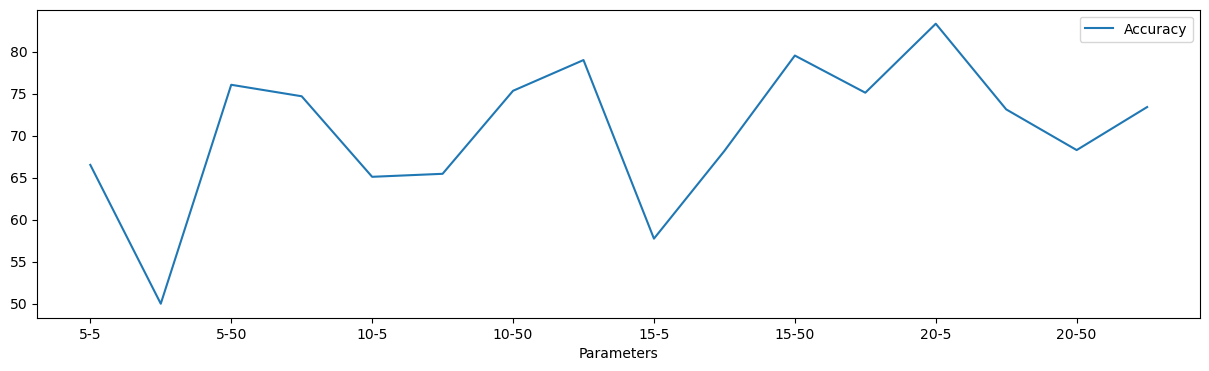

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy',figsize=(15,4), kind='line')

# Training the ANN model with best best parameter

In [ ]:
#fitting the ANN to the training set
model.fit(X_train, y_train, batch_size = 20, epochs = 5, verbose=1)

Epoch 1/5
201/201 [==============================] - 0s 1ms/step - loss: 0.1456
Epoch 2/5
201/201 [==============================] - 0s 1ms/step - loss: 0.1435
Epoch 3/5
201/201 [==============================] - 0s 1ms/step - loss: 0.1437
Epoch 4/5
201/201 [==============================] - 0s 2ms/step - loss: 0.1450
Epoch 5/5
201/201 [==============================] - 0s 2ms/step - loss: 0.1439


In [ ]:
#generating predictions on the test set
Predictions = model.predict(X_test)

54/54 [==============================] - 0s 2ms/step


In [ ]:
#scalinng back the predictions to original scale
Predictions = targetScalerFit.inverse_transform(Predictions)

In [ ]:
#scaling back the y_test to original scale
y_test_orig = targetScalerFit.inverse_transform(y_test)

In [ ]:
#scaling test data back to orginal
Test_data = predictorScalerFit.inverse_transform(X_test)

In [ ]:
Testing_data = pd.DataFrame(data=Test_data, columns=predictors.columns)
Testing_data['Actual Mins'] = y_test_orig
Testing_data['PredictedMins'] = Predictions
Testing_data.head()

,reporting_period,number_flights_matched,actual_flights_unmatched,number_flights_cancelled,flights_more_than_15_minutes_early_percent,flights_15_minutes_early_to_1_minute_early_percent,flights_0_to_15_minutes_late_percent,flights_between_16_and_30_minutes_late_percent,flights_between_31_and_60_minutes_late_percent,flights_between_61_and_120_minutes_late_percent,flights_between_121_and_180_minutes_late_percent,flights_between_181_and_360_minutes_late_percent,flights_more_than_360_minutes_late_percent,arrival_departure_A,arrival_departure_D,scheduled_charter_C,scheduled_charter_S,Actual Mins,PredictedMins
0,202202.0,6.0,0.0,2.775558e-17,0.0,0.000000,83.333333,0.000000,0.000000,0.000000,0.000000,16.666667,0.0,0.0,1.0,1.0,0.0,39.0,40.157040
1,202205.0,117.0,0.0,2.775558e-17,0.0,14.529915,43.589744,21.367521,16.239316,3.418803,0.854701,0.000000,0.0,0.0,1.0,0.0,1.0,19.0,19.798374
2,202302.0,1.0,0.0,2.775558e-17,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.0,0.0,1.0,1.0,0.0,135.0,152.398102
3,202206.0,3.0,0.0,2.775558e-17,0.0,33.333333,33.333333,0.000000,0.000000,33.333333,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,22.0,33.993065
4,202206.0,1.0,0.0,2.775558e-17,0.0,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,117.0,87.383865


# Find Accuracy

MAPE = mean absolute percentage error

In [ ]:
#calcalate the absolute percent error
APE= 100*(abs(Testing_data['Actual Mins']-Testing_data['PredictedMins'])/Testing_data['Actual Mins'])
Testing_data['APE'] = APE

print(100-np.mean(APE))
Testing_data.head()

80.09002591456397


,reporting_period,number_flights_matched,actual_flights_unmatched,number_flights_cancelled,flights_more_than_15_minutes_early_percent,flights_15_minutes_early_to_1_minute_early_percent,flights_0_to_15_minutes_late_percent,flights_between_16_and_30_minutes_late_percent,flights_between_31_and_60_minutes_late_percent,flights_between_61_and_120_minutes_late_percent,flights_between_121_and_180_minutes_late_percent,flights_between_181_and_360_minutes_late_percent,flights_more_than_360_minutes_late_percent,arrival_departure_A,arrival_departure_D,scheduled_charter_C,scheduled_charter_S,Actual Mins,PredictedMins,APE
0,202202.0,6.0,0.0,2.775558e-17,0.0,0.000000,83.333333,0.000000,0.000000,0.000000,0.000000,16.666667,0.0,0.0,1.0,1.0,0.0,39.0,40.157040,2.966768
1,202205.0,117.0,0.0,2.775558e-17,0.0,14.529915,43.589744,21.367521,16.239316,3.418803,0.854701,0.000000,0.0,0.0,1.0,0.0,1.0,19.0,19.798374,4.201969
2,202302.0,1.0,0.0,2.775558e-17,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.0,0.0,1.0,1.0,0.0,135.0,152.398102,12.887483
3,202206.0,3.0,0.0,2.775558e-17,0.0,33.333333,33.333333,0.000000,0.000000,33.333333,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,22.0,33.993065,54.513931
4,202206.0,1.0,0.0,2.775558e-17,0.0,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,117.0,87.383865,25.312936


In [ ]:
Testing_data['Actual Mins'].max()

1285.0

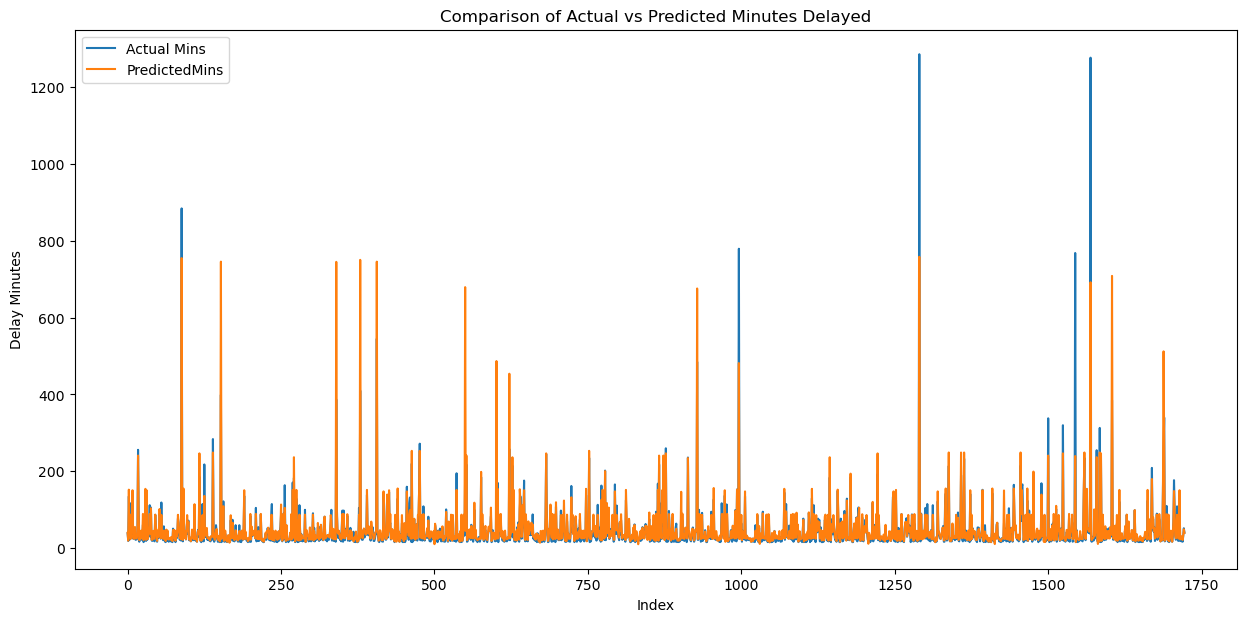

In [ ]:
#plot the Mins and PredictedMins columns using line chart
plt.figure(figsize=(15, 7))
plt.plot(Testing_data['Actual Mins'], label='Actual Mins')
plt.plot(Testing_data['PredictedMins'], label='PredictedMins')
plt.xlabel('Index')
plt.ylabel('Delay Minutes')
plt.title("Comparison of Actual vs Predicted Minutes Delayed")
plt.legend()
plt.show()

find a way to predcit excatly unseen data to give the regr output

In [ ]:
def predict_average_delay_mins(user_data_list, predictor_scaler):
    # Preprocess user data as a DataFrame
    user_df = pd.DataFrame(user_data_list)
    user_df.columns = predictors.columns
    
    # Standardize the user's data
    user_data_scaled = predictor_scaler.transform(user_df)
    
    # Generate predictions
    predictions = model.predict(user_data_scaled)
    
    # Scale back the predictions to the original scale
    predictions_original_scale = targetScaler.inverse_transform(predictions)
    
    # Find the average delay minutes
    average_delay_mins = np.mean(predictions_original_scale)
    
    return average_delay_mins

In [ ]:
user_data_list = [
    {
        'reporting_period': 202206,
        'number_flights_matched': 1,
        'actual_flights_unmatched': 0,
        'number_flights_cancelled': 0,
        'flights_more_than_15_minutes_early_percent': 0,
        'flights_15_minutes_early_to_1_minute_early_percent': 0,
        'flights_0_to_15_minutes_late_percent': 0,
        'flights_between_16_and_30_minutes_late_percent': 0,
        'flights_between_31_and_60_minutes_late_percent': 0,
        'flights_between_61_and_120_minutes_late_percent': 100,
        'flights_between_121_and_180_minutes_late_percent': 0,
        'flights_between_181_and_360_minutes_late_percent': 0,
        'flights_more_than_360_minutes_late_percent': 0,
        'arrival_departure_A': 1,
        'arrival_departure_D': 0,
        'scheduled_charter_C': 0,
        'scheduled_charter_S': 1
    }
]

average_delay_mins = predict_average_delay_mins(user_data_list, predictorScalerFit)
print(f"The average delay minutes for the provided data is: {average_delay_mins:.2f}")

1/1 [==============================] - 0s 28ms/step
The average delay minutes for the provided data is: 89.28


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
#save it a joblib variable
import pickle

# Save the model and scaler
pickle.dump(model, open('model.sav', 'wb'))
load_model = pickle.load(open('model.pkl','rb'))

NameError: name 'model' is not defined

# Find best hyperparameters

In [ ]:

'''# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=5, input_dim=17, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model'''

In [ ]:
'''import keras
print(keras.__file__)'''

C:\Users\dkout\AppData\Roaming\Python\Python311\site-packages\keras\__init__.py


**find this shit**:       keras.wrappers.scikit_learn

In [ ]:
'''from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier'''

In [ ]:
'''from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                    'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                }

# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)'''

"from sklearn.model_selection import GridSearchCV\nfrom keras.wrappers.scikit_learn import KerasRegressor\n\n# Listing all the parameters to try\nParameter_Trials={'batch_size':[10,20,30],\n                    'epochs':[10,20],\n                    'Optimizer_trial':['adam', 'rmsprop']\n                }\n\n# Creating the regression ANN model\nRegModel=KerasRegressor(make_regression_ann, verbose=0)"

In [ ]:
'''from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)'''

"from sklearn.metrics import make_scorer\n\n# Defining a custom function to calculate accuracy\ndef Accuracy_Score(orig,pred):\n    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))\n    print('#'*70,'Accuracy:', 100-MAPE)\n    return(100-MAPE)\n\ncustom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)"

In [ ]:
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
'''grid_search=GridSearchCV(estimator=RegModel, 
                        param_grid=Parameter_Trials, 
                        scoring=custom_Scoring, 
                        cv=5)'''

In [ ]:
# Measuring how much time it took to find the best params
'''import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

print('### Printing Best parameters ###')
grid_search.best_params_'''

# Building the network

In [ ]:
from keras import layers
from keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import tensorflow as tf

In [ ]:
# importing the libraries
from tensorflow import keras
#from tensorflow.keras import layers 
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Define number of features
num_features = 17

In [ ]:
# create ANN model
model = Sequential()

In [ ]:
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=num_features, kernel_initializer='normal', activation='relu'))

In [ ]:
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

In [ ]:
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

In [ ]:
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

In [ ]:
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train, 
        batch_size = 20, 
        epochs = 50, verbose=1)

Epoch 1/50



201/201 [==============================] - 1s 1ms/step - loss: 0.7626
Epoch 2/50
201/201 [==============================] - 0s 1ms/step - loss: 0.5095
Epoch 3/50
201/201 [==============================] - 0s 1ms/step - loss: 0.4294
Epoch 4/50
201/201 [==============================] - 0s 1ms/step - loss: 0.3888
Epoch 5/50
201/201 [==============================] - 0s 1ms/step - loss: 0.3646
Epoch 6/50
201/201 [==============================] - 0s 1ms/step - loss: 0.3474
Epoch 7/50
201/201 [==============================] - 0s 1ms/step - loss: 0.3338
Epoch 8/50
201/201 [==============================] - 0s 1ms/step - loss: 0.3209
Epoch 9/50
201/201 [==============================] - 0s 1ms/step - loss: 0.3106
Epoch 10/50
201/201 [==============================] - 0s 1ms/step - loss: 0.3029
Epoch 11/50
201/201 [==============================] - 0s 1ms/step - loss: 0.2957
Epoch 12/50
201/201 [==============================] - 0s 1ms/step - loss: 0.2884
Epoch 13/50
201/201 [===============

# Finding best parameters using manual grid search

In [ ]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=pd.concat([SearchResultsData, pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] )])
    return(SearchResultsData)

######################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

54/54 [==============================] - 0s 1ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 66.52603854527806
54/54 [==============================] - 0s 1ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 49.99631463818439
54/54 [==============================] - 0s 2ms/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 76.06227524481167
54/54 [==============================] - 0s 1ms/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 74.69568004387449
54/54 [==============================] - 0s 1ms/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 65.10666320145192
54/54 [==============================] - 0s 1ms/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 65.46356269636502
54/54 [==============================] - 0s 1ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 75.34773774158045
54/54 [==============================] - 0s 2ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 79.00681464178489
54/54 [=============

<Axes: xlabel='Parameters'>

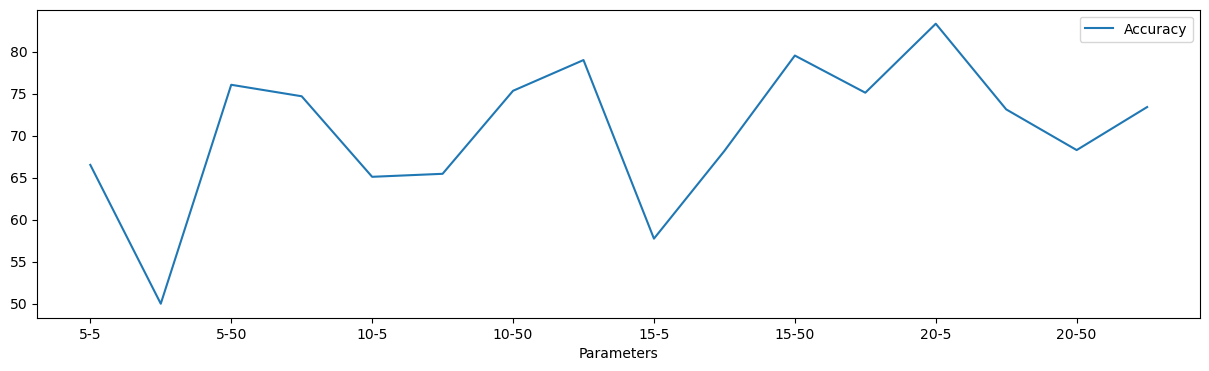

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy',figsize=(15,4), kind='line')

# Training the ANN model with best best parameter

In [ ]:
#fitting the ANN to the training set
model.fit(X_train, y_train, batch_size = 20, epochs = 5, verbose=1)

Epoch 1/5
201/201 [==============================] - 0s 1ms/step - loss: 0.1456
Epoch 2/5
201/201 [==============================] - 0s 1ms/step - loss: 0.1435
Epoch 3/5
201/201 [==============================] - 0s 1ms/step - loss: 0.1437
Epoch 4/5
201/201 [==============================] - 0s 2ms/step - loss: 0.1450
Epoch 5/5
201/201 [==============================] - 0s 2ms/step - loss: 0.1439


In [ ]:
#generating predictions on the test set
Predictions = model.predict(X_test)

54/54 [==============================] - 0s 2ms/step


In [ ]:
#scalinng back the predictions to original scale
Predictions = targetScalerFit.inverse_transform(Predictions)

In [ ]:
#scaling back the y_test to original scale
y_test_orig = targetScalerFit.inverse_transform(y_test)

In [ ]:
#scaling test data back to orginal
Test_data = predictorScalerFit.inverse_transform(X_test)

In [ ]:
Testing_data = pd.DataFrame(data=Test_data, columns=predictors.columns)
Testing_data['Actual Mins'] = y_test_orig
Testing_data['PredictedMins'] = Predictions
Testing_data.head()

,reporting_period,number_flights_matched,actual_flights_unmatched,number_flights_cancelled,flights_more_than_15_minutes_early_percent,flights_15_minutes_early_to_1_minute_early_percent,flights_0_to_15_minutes_late_percent,flights_between_16_and_30_minutes_late_percent,flights_between_31_and_60_minutes_late_percent,flights_between_61_and_120_minutes_late_percent,flights_between_121_and_180_minutes_late_percent,flights_between_181_and_360_minutes_late_percent,flights_more_than_360_minutes_late_percent,arrival_departure_A,arrival_departure_D,scheduled_charter_C,scheduled_charter_S,Actual Mins,PredictedMins
0,202202.0,6.0,0.0,2.775558e-17,0.0,0.000000,83.333333,0.000000,0.000000,0.000000,0.000000,16.666667,0.0,0.0,1.0,1.0,0.0,39.0,40.157040
1,202205.0,117.0,0.0,2.775558e-17,0.0,14.529915,43.589744,21.367521,16.239316,3.418803,0.854701,0.000000,0.0,0.0,1.0,0.0,1.0,19.0,19.798374
2,202302.0,1.0,0.0,2.775558e-17,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.0,0.0,1.0,1.0,0.0,135.0,152.398102
3,202206.0,3.0,0.0,2.775558e-17,0.0,33.333333,33.333333,0.000000,0.000000,33.333333,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,22.0,33.993065
4,202206.0,1.0,0.0,2.775558e-17,0.0,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,117.0,87.383865


# Find Accuracy

MAPE = mean absolute percentage error

In [ ]:
#calcalate the absolute percent error
APE= 100*(abs(Testing_data['Actual Mins']-Testing_data['PredictedMins'])/Testing_data['Actual Mins'])
Testing_data['APE'] = APE

print(100-np.mean(APE))
Testing_data.head()

80.09002591456397


,reporting_period,number_flights_matched,actual_flights_unmatched,number_flights_cancelled,flights_more_than_15_minutes_early_percent,flights_15_minutes_early_to_1_minute_early_percent,flights_0_to_15_minutes_late_percent,flights_between_16_and_30_minutes_late_percent,flights_between_31_and_60_minutes_late_percent,flights_between_61_and_120_minutes_late_percent,flights_between_121_and_180_minutes_late_percent,flights_between_181_and_360_minutes_late_percent,flights_more_than_360_minutes_late_percent,arrival_departure_A,arrival_departure_D,scheduled_charter_C,scheduled_charter_S,Actual Mins,PredictedMins,APE
0,202202.0,6.0,0.0,2.775558e-17,0.0,0.000000,83.333333,0.000000,0.000000,0.000000,0.000000,16.666667,0.0,0.0,1.0,1.0,0.0,39.0,40.157040,2.966768
1,202205.0,117.0,0.0,2.775558e-17,0.0,14.529915,43.589744,21.367521,16.239316,3.418803,0.854701,0.000000,0.0,0.0,1.0,0.0,1.0,19.0,19.798374,4.201969
2,202302.0,1.0,0.0,2.775558e-17,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.0,0.0,1.0,1.0,0.0,135.0,152.398102,12.887483
3,202206.0,3.0,0.0,2.775558e-17,0.0,33.333333,33.333333,0.000000,0.000000,33.333333,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,22.0,33.993065,54.513931
4,202206.0,1.0,0.0,2.775558e-17,0.0,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,117.0,87.383865,25.312936


In [ ]:
Testing_data['Actual Mins'].max()

1285.0

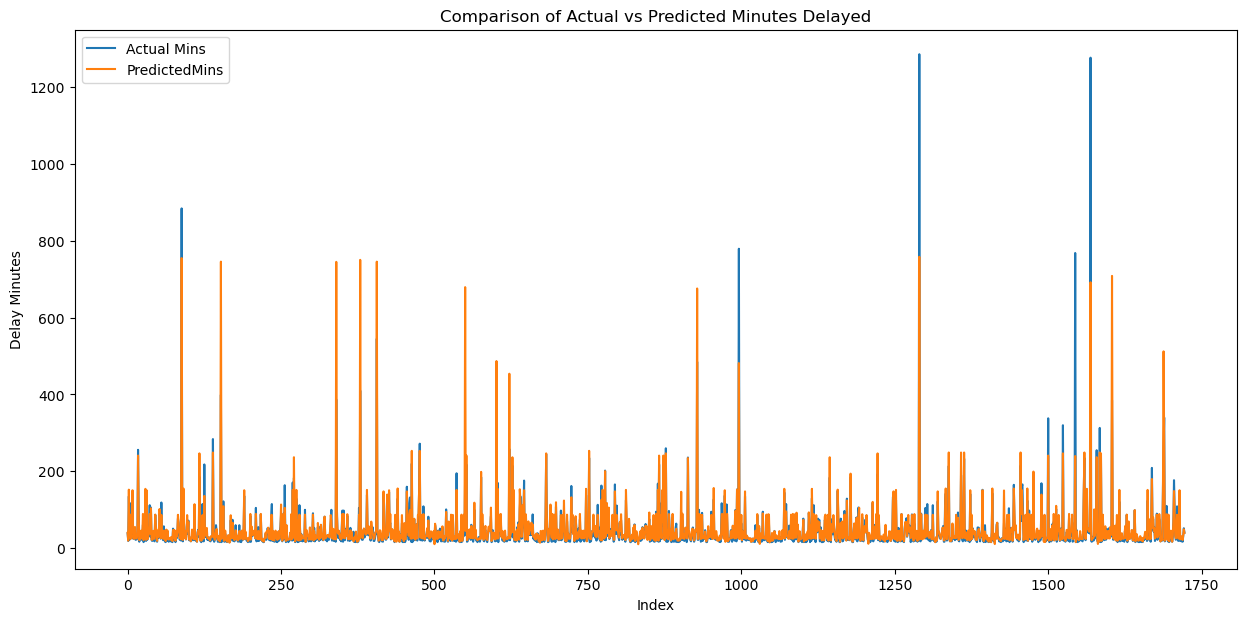

In [ ]:
#plot the Mins and PredictedMins columns using line chart
plt.figure(figsize=(15, 7))
plt.plot(Testing_data['Actual Mins'], label='Actual Mins')
plt.plot(Testing_data['PredictedMins'], label='PredictedMins')
plt.xlabel('Index')
plt.ylabel('Delay Minutes')
plt.title("Comparison of Actual vs Predicted Minutes Delayed")
plt.legend()
plt.show()

find a way to predcit excatly unseen data to give the regr output

In [ ]:
def predict_average_delay_mins(user_data_list, predictor_scaler):
    # Preprocess user data as a DataFrame
    user_df = pd.DataFrame(user_data_list)
    user_df.columns = predictors.columns
    
    # Standardize the user's data
    user_data_scaled = predictor_scaler.transform(user_df)
    
    # Generate predictions
    predictions = model.predict(user_data_scaled)
    
    # Scale back the predictions to the original scale
    predictions_original_scale = targetScaler.inverse_transform(predictions)
    
    # Find the average delay minutes
    average_delay_mins = np.mean(predictions_original_scale)
    
    return average_delay_mins

In [ ]:
user_data_list = [
    {
        'reporting_period': 202206,
        'number_flights_matched': 1,
        'actual_flights_unmatched': 0,
        'number_flights_cancelled': 0,
        'flights_more_than_15_minutes_early_percent': 0,
        'flights_15_minutes_early_to_1_minute_early_percent': 0,
        'flights_0_to_15_minutes_late_percent': 0,
        'flights_between_16_and_30_minutes_late_percent': 0,
        'flights_between_31_and_60_minutes_late_percent': 0,
        'flights_between_61_and_120_minutes_late_percent': 100,
        'flights_between_121_and_180_minutes_late_percent': 0,
        'flights_between_181_and_360_minutes_late_percent': 0,
        'flights_more_than_360_minutes_late_percent': 0,
        'arrival_departure_A': 1,
        'arrival_departure_D': 0,
        'scheduled_charter_C': 0,
        'scheduled_charter_S': 1
    }
]

average_delay_mins = predict_average_delay_mins(user_data_list, predictorScalerFit)
print(f"The average delay minutes for the provided data is: {average_delay_mins:.2f}")

1/1 [==============================] - 0s 28ms/step
The average delay minutes for the provided data is: 89.28


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
#save it a joblib variable
import joblib

# Save the model and scaler
joblib.dump(model, 'model.sav')
loaded_model = joblib.load('model.sav')
loaded_target = joblib.dump(targetScaler, 'target_scaler.sav')

# Find best hyperparameters

In [ ]:

'''# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=5, input_dim=17, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model'''

In [ ]:
'''import keras
print(keras.__file__)'''

C:\Users\dkout\AppData\Roaming\Python\Python311\site-packages\keras\__init__.py


**find this shit**:       keras.wrappers.scikit_learn

In [ ]:
'''from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier'''

In [ ]:
'''from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                    'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                }

# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)'''

"from sklearn.model_selection import GridSearchCV\nfrom keras.wrappers.scikit_learn import KerasRegressor\n\n# Listing all the parameters to try\nParameter_Trials={'batch_size':[10,20,30],\n                    'epochs':[10,20],\n                    'Optimizer_trial':['adam', 'rmsprop']\n                }\n\n# Creating the regression ANN model\nRegModel=KerasRegressor(make_regression_ann, verbose=0)"

In [ ]:
'''from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)'''

"from sklearn.metrics import make_scorer\n\n# Defining a custom function to calculate accuracy\ndef Accuracy_Score(orig,pred):\n    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))\n    print('#'*70,'Accuracy:', 100-MAPE)\n    return(100-MAPE)\n\ncustom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)"

In [ ]:
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
'''grid_search=GridSearchCV(estimator=RegModel, 
                        param_grid=Parameter_Trials, 
                        scoring=custom_Scoring, 
                        cv=5)'''

In [ ]:
# Measuring how much time it took to find the best params
'''import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

print('### Printing Best parameters ###')
grid_search.best_params_'''